# ¿Qué es la clasificación de texto?

La clasificación de texto es un proceso automatizado de clasificación de texto en categorías predefinidas. Podemos clasificar los correos electrónicos en spam o no spam, los artículos de noticias en diferentes categorías, como Política, Bolsa, Deportes, etc.

Esto se puede hacer con la ayuda del procesamiento del lenguaje natural y diferentes algoritmos de clasificación como Naive Bayes, SVM e incluso redes neuronales en Python.

## ¿Qué es el procesamiento del lenguaje natural?

Abreviatura de procesamiento del lenguaje natural , NLP es una rama de la inteligencia artificial que se centra en permitir que las computadoras comprendan e interpreten el lenguaje humano. El problema con la interpretación del lenguaje humano es que no es un conjunto de reglas o datos binarios que se pueden introducir en el sistema y comprender el contexto de una conversación o leer entre líneas es un juego de pelota completamente diferente.

Sin embargo, con el avance reciente en el aprendizaje automático, el aprendizaje profundo con la ayuda de las redes neuronales y los modelos fáciles usados en python nos han abierto las puertas para codificar nuestro camino para hacer que las computadoras entiendan el complejo lenguaje humano.

## Modelo de aprendizaje automático supervisado para clasificar el texto

Usaré el conjunto de datos de revisión de Amazon que tiene 10,000 filas de datos de texto que se clasifican en "Etiqueta 1" y "Etiqueta 2". El conjunto de datos tiene dos columnas "Texto" y "Etiqueta".

# Imports

In [1]:
# Instalar previamente la libreria nltk
# !pip install nltk
# nltk.download()

import pandas as pd
import numpy as np
# import nltk

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Establecemos una semilla aleatoria para reproducir el mismo resultado cada vez si el script se mantiene consistente; de lo contrario, cada ejecución producirá resultados diferentes. La semilla se puede establecer con cualquier número.

In [2]:
#Establecer semilla aleatoria
np.random.seed(500)

El conjunto de datos se puede agregar fácilmente como un data frame de pandas con la ayuda de la función `read_csv`. Se establece la codificación en 'latin-1' ya que el texto tenía muchos caracteres especiales.

In [3]:
# Agregue los datos usando pandas
Corpus = pd.read_csv("corpus.csv", encoding='latin-1')

### Preprocesamiento de datos

Este es un paso importante en cualquier proceso de minería de datos. Básicamente, esto implica transformar los datos sin procesar en un formato comprensible para los modelos NLP. Los datos del mundo real a menudo son incompletos, inconsistentes y/o carecen de ciertos comportamientos o tendencias, y es probable que contengan muchos errores. El preprocesamiento de datos es un método comprobado para resolver tales problemas. Esto ayudará a obtener mejores resultados a través de los algoritmos de clasificación.

A continuación, se explicaran las dos técnicas que también se realizan además de otros pasos fáciles de entender en el preprocesamiento de datos:

1. **Tokenización**: este es un proceso de dividir un flujo de texto en palabras, frases, símbolos u otros elementos significativos llamados tokens. La lista de tokens se convierte en entrada para su posterior procesamiento. La biblioteca NLTK tiene word_tokenize y sent_tokenize para dividir fácilmente un flujo de texto en una lista de palabras u oraciones, respectivamente.

2. **Word Stemming/Lematization**: El objetivo de ambos procesos es el mismo, reducir las formas flexivas de cada palabra a una base o raíz común. La lematización está estrechamente relacionada con la lematización. La diferencia es que un lematizador opera en una sola palabra sin conocimiento del contexto y, por lo tanto, no puede discriminar entre palabras que tienen diferentes significados según la parte del discurso. Sin embargo, los lematizadores suelen ser más fáciles de implementar y ejecutar más rápido, y la precisión reducida puede no ser importante para algunas aplicaciones.

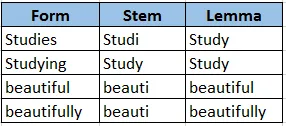

Aquí está el script completo que realiza los pasos de preprocesamiento de datos antes mencionados, siempre puede agregar o eliminar los pasos que mejor se adapten al conjunto de datos con el que está tratando:

1. Eliminar filas en blanco en datos, si las hay
2. Cambiar todo el texto a minúsculas
3. Tokenización de palabras
4. Eliminar palabras vacías
5. Eliminar texto no alfabético
6. Lematización de palabras

In [4]:
# Paso - 1: Preprocesamiento de datos: esto ayudará a obtener mejores 
# resultados a través de los algoritmos de clasificación

# Paso - 1a: elimine las filas en blanco, si las hay.
Corpus['text'].dropna(inplace=True)

In [5]:
# Paso - b : Cambia todo el texto a minúsculas. Esto es necesario ya que Python 
# interpreta 'perro' y 'PERRO' de manera diferente 

Corpus['text'] = [entry.lower() for entry in Corpus['text']]

In [6]:
# Paso - c: Tokenización: En esto, cada entrada en el corpus se dividirá 
# en un conjunto de palabras 

Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]

In [7]:
# Paso - d: Quite las palabras vacías, no numéricas y realice 
# Word Stemming/Lemmenting.

# WordNetLemmatizer requiere etiquetas Pos para comprender si la palabra 
# es un sustantivo, un verbo o un adjetivo, etc. De manera predeterminada, 
# se establece en Noun 

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [8]:
for index,entry in enumerate(Corpus['text']):
    # Declarar lista vacía para almacenar las palabras que siguen 
    # las reglas para este paso    
    Final_words = []
    # Inicializar WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # La función pos_tag a continuación proporcionará la 'etiqueta', 
    # es decir, si la palabra es Sustantivo (N) o Verbo (V) o algo más. 
    for word, tag in pos_tag(entry):
        # La siguiente condición es verificar las palabras vacías y considerar 
        # solo los alfabetos 
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # El conjunto final de palabras procesadas para cada iteración 
    # se almacenará en 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [9]:
print(Corpus['text_final'].head())

0    ['stun', 'even', 'sound', 'track', 'beautiful'...
1    ['best', 'soundtrack', 'ever', 'anything', 're...
2    ['amaze', 'soundtrack', 'favorite', 'music', '...
3    ['excellent', 'soundtrack', 'truly', 'like', '...
4    ['remember', 'pull', 'jaw', 'floor', 'hear', '...
Name: text_final, dtype: object


### Preparar conjuntos de datos de prueba y entrenamiento

El Corpus se dividirá en dos conjuntos de datos, Entrenamiento y Prueba. El conjunto de datos de entrenamiento se usará para ajustar el modelo y las predicciones se realizarán en el conjunto de datos de prueba. Esto se puede hacer a través de `train_test_split` de la biblioteca `sklearn`. Los datos de entrenamiento tendrán el 70% del corpus y los datos de prueba tendrán el 30% restante, ya que hemos configurado el parámetro `test_size=0.3`.

In [10]:
# Paso - 2: Divida el modelo en un conjunto de datos de entrenamiento y prueba
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.3)

### Codificación

Etiquetar codificar la variable de destino: esto se hace para transformar datos categóricos de tipo cadena en el conjunto de datos en valores numéricos que el modelo puede entender.

In [11]:
# Paso - 3: Etiquetar codificar la variable de destino 
# Esto se hace para transformar datos categóricos de tipo cadena 
# en el conjunto de datos en valores numéricos

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

### Vectorización de palabras

Es un proceso general de convertir una colección de documentos de texto en vectores de características numéricas. Hay muchos métodos para convertir datos de texto en vectores que el modelo puede entender, pero el método más popular se llama *TF-IDF*. Este es un acrónimo que significa "Frecuencia de término - Documento inverso" Frecuencia que son los componentes de los puntajes resultantes asignados a cada palabra.

**Frecuencia de términos**: Esto resume con qué frecuencia aparece una palabra dada dentro de un documento.

**Frecuencia inversa del documento**: esto reduce la escala de las palabras que aparecen mucho en los documentos.

Sin entrar en matemáticas, *TF-IDF* son puntajes de frecuencia de palabras que intentan resaltar las palabras que son más interesantes, por ejemplo, frecuentes en un documento pero no entre documentos.

 La siguiente sintaxis se puede usar para ajustar primero el modelo TG-IDF en todo el corpus. Esto ayudará a *TF-IDF* a construir un vocabulario de palabras que ha aprendido de los datos del corpus y asignará un número entero único a cada una de estas palabras. Habrá un máximo de 5000 palabras/características únicas, ya que hemos establecido el parámetro `max_features=5000`.

Finalmente, transformaremos Train_X y Test_X en Train_X_Tfidf y Test_X_Tfidf vectorizados . Estos ahora contendrán para cada fila una lista de números enteros únicos y su importancia asociada según lo calculado por TF-IDF.

In [12]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

Puede usar la siguiente sintaxis para ver el vocabulario que ha aprendido del corpus

In [13]:
print(Tfidf_vect.vocabulary_)

{'stun': 4277, 'even': 1532, 'sound': 4132, 'track': 4558, 'beautiful': 382, 'paint': 3156, 'mind': 2841, 'well': 4866, 'would': 4952, 'recomend': 3596, 'people': 3228, 'hate': 2057, 'video': 4768, 'game': 1869, 'music': 2925, 'play': 3301, 'cross': 1018, 'ever': 1536, 'best': 424, 'back': 329, 'away': 319, 'crude': 1021, 'take': 4370, 'fresh': 1826, 'step': 4221, 'guitar': 2010, 'soulful': 4129, 'orchestra': 3096, 'impress': 2244, 'anyone': 203, 'care': 637, 'listen': 2605, 'soundtrack': 4134, 'anything': 204, 'read': 3562, 'lot': 2649, 'review': 3725, 'say': 3843, 'figure': 1697, 'write': 4958, 'disagree': 1225, 'bit': 446, 'ultimate': 4635, 'masterpiece': 2750, 'timeless': 4505, 'year': 4977, 'beauty': 384, 'simply': 4017, 'refuse': 3622, 'price': 3407, 'tag': 4369, 'pretty': 3402, 'must': 2931, 'go': 1934, 'buy': 592, 'cd': 670, 'much': 2916, 'money': 2878, 'one': 3076, 'feel': 1674, 'worth': 4948, 'every': 1538, 'penny': 3227, 'amaze': 149, 'favorite': 1663, 'time': 4504, 'hand': 

Y puede imprimir directamente los datos vectorizados para ver cómo se ve

In [14]:
print(Train_X_Tfidf)

  (0, 4505)	0.37634188677099956
  (0, 4504)	0.1502086671688917
  (0, 3977)	0.35870975205557054
  (0, 3893)	0.25152943577361386
  (0, 3863)	0.2690840463105974
  (0, 3749)	0.3469774999759746
  (0, 3659)	0.28971770688512954
  (0, 3562)	0.29440491517773787
  (0, 2931)	0.22969709983777647
  (0, 1942)	0.13398240399394393
  (0, 1532)	0.17762585383071805
  (0, 519)	0.3210759641783664
  (0, 490)	0.1230432680090133
  (0, 240)	0.24487094004433968
  (1, 4694)	0.36974013511943044
  (1, 4073)	0.6167222431544791
  (1, 3434)	0.367922932130556
  (1, 2581)	0.3755181501193181
  (1, 1247)	0.3587203442870721
  (1, 592)	0.27907786873623097
  (2, 4740)	0.18369761701331289
  (2, 4627)	0.1499525624356807
  (2, 4465)	0.10285168719742008
  (2, 4206)	0.11682860303877614
  (2, 3855)	0.23042292688427712
  :	:
  (6998, 2508)	0.11515961575144278
  (6998, 2128)	0.13654425766350872
  (6998, 1977)	0.07125207506420554
  (6998, 1785)	0.22020146972839663
  (6998, 1749)	0.19941178219513117
  (6998, 1713)	0.13513147046115875

Ahora nuestros conjuntos de datos están listos para incorporarse a diferentes algoritmos de clasificación.

### Use los algoritmos de ML para predecir el resultado

En primer lugar, probemos el algoritmo clasificador Naive Bayes.

In [15]:
# Paso - 5: Ahora podemos ejecutar diferentes algoritmos para clasificar 

# Clasificador - Algoritmo - Naive Bayes
# ajustar el conjunto de datos de entrenamiento en el clasificador

Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)

MultinomialNB()

In [16]:
# predecir las etiquetas en el conjunto de datos de validación

predictions_NB = Naive.predict(Test_X_Tfidf)

In [17]:
# Use la función accuracy_score para obtener la precisión

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  83.26666666666667


El siguiente es el SVM — Support Vector Machine.

In [18]:
# Clasificador - Algoritmo - SVM
# ajustar el conjunto de datos de entrenamiento en el clasificador

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)


SVC(gamma='auto', kernel='linear')

In [19]:
# predecir las etiquetas en el conjunto de datos de validación

predictions_SVM = SVM.predict(Test_X_Tfidf)

In [20]:
# Use la función accuracy_score para obtener la precisión

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  84.6


Espero que esto haya explicado bien qué es la clasificación de texto y cómo se puede implementar fácilmente en Python.

Como siguiente paso puedes intentar lo siguiente:

1. Juegue con los pasos de preprocesamiento de datos y vea cómo afecta la precisión.
2. Pruebe otras técnicas de vectorización de palabras como `Count Vectorizer` y `Word2Vec`.
3. Pruebe el ajuste de parámetros con la ayuda de `GridSearchCV` en estos algoritmos.
4. Pruebe otros algoritmos de clasificación como clasificador lineal, modelos de impulso e incluso redes neuronales.